In [2]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(0, 5, 1000)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])

In [3]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5

Text(0.5, 1.0, 'Samples from prior distribution')

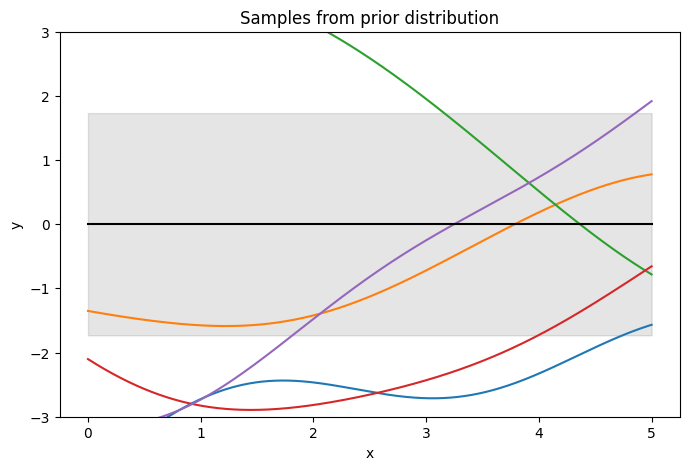

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel,WhiteKernel

kernel = 3 * RBF(length_scale=2)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 5))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs)
axs.set_title("Samples from prior distribution")

In [66]:
kernel.hyperparameters

[Hyperparameter(name='k1__constant_value', value_type='numeric', bounds=array([[1.e-05, 1.e+05]]), n_elements=1, fixed=False),
 Hyperparameter(name='k2__length_scale', value_type='numeric', bounds=array([[1.e-05, 1.e+05]]), n_elements=1, fixed=False)]

Text(0.5, 1.0, 'Samples from prior distribution')

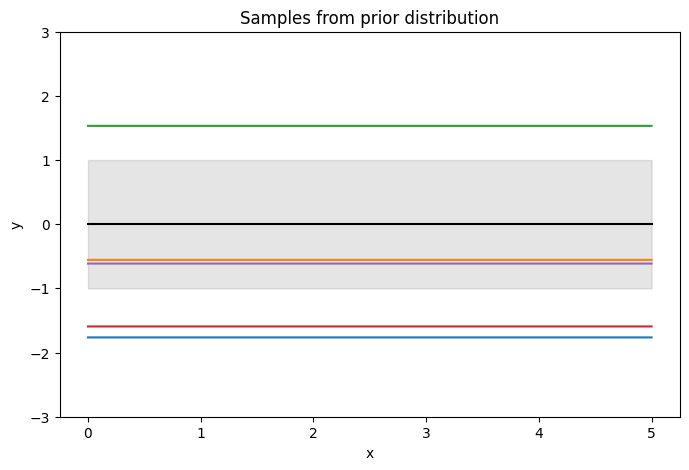

In [53]:
ckernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-05, 100000.0))

gpr_c = GaussianProcessRegressor(kernel=ckernel, random_state=0)

fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 5))

# plot prior
plot_gpr_samples(gpr_c, n_samples=n_samples, ax=axs)
axs.set_title("Samples from prior distribution")

Text(0.5, 1.0, 'Samples from prior distribution')

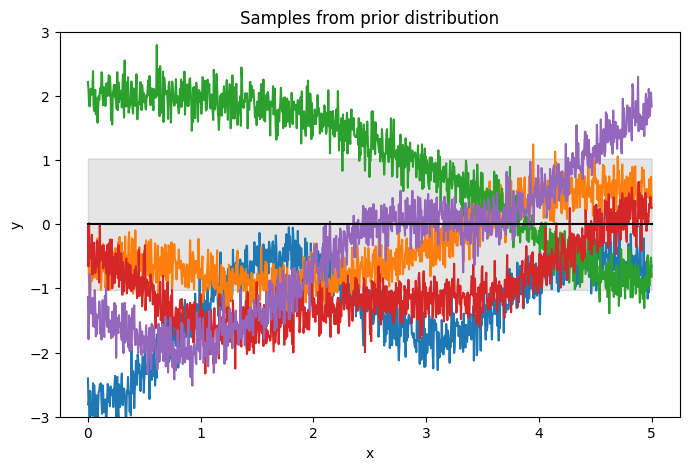

In [54]:
wkernel = WhiteKernel(noise_level=.05)+1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

gpr_w = GaussianProcessRegressor(kernel=wkernel, random_state=0)

fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 5))

# plot prior
plot_gpr_samples(gpr_w, n_samples=n_samples, ax=axs)
axs.set_title("Samples from prior distribution")

In [55]:
kernel.hyperparameters

[Hyperparameter(name='k1__constant_value', value_type='numeric', bounds=array([[1.e-05, 1.e+05]]), n_elements=1, fixed=False),
 Hyperparameter(name='k2__length_scale', value_type='numeric', bounds=array([[ 0.1, 10. ]]), n_elements=1, fixed=False)]